In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.linspace(0,10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [3]:
np.linspace(0,10,num=11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [4]:
x = np.linspace(0,10)
y = x + np.random.standard_normal(len(x))
y

array([-0.13859958,  1.05155289,  0.45189077,  1.30626255,  1.2854476 ,
        1.48326196,  1.75784584,  1.86128522,  1.35635539,  3.10934748,
        2.72707237,  2.58006226,  2.38628   ,  3.39943194,  2.53228514,
        3.21541512,  2.90869882,  3.41316473,  3.59897067,  4.51103033,
        5.63115322,  2.86822472,  4.89686163,  5.700744  ,  3.82035938,
        5.0056247 ,  6.56850906,  5.24638433,  6.0146326 ,  5.93643274,
        7.21853334,  8.5169846 ,  8.36732641,  7.15184766,  9.13783044,
        7.14808499,  7.24431199,  7.15771856,  8.28454515,  7.02395426,
        8.41900057,  8.09069771,  8.2708955 ,  8.09449929,  9.06348924,
        9.47632566, 10.11249957,  9.75056075,  9.28588248, 10.40598269])

In [5]:
#ols[0] -> slope, ols[1] -> intercept
ols = np.polyfit(x,y,deg=1)
ols

array([0.97509742, 0.41865208])

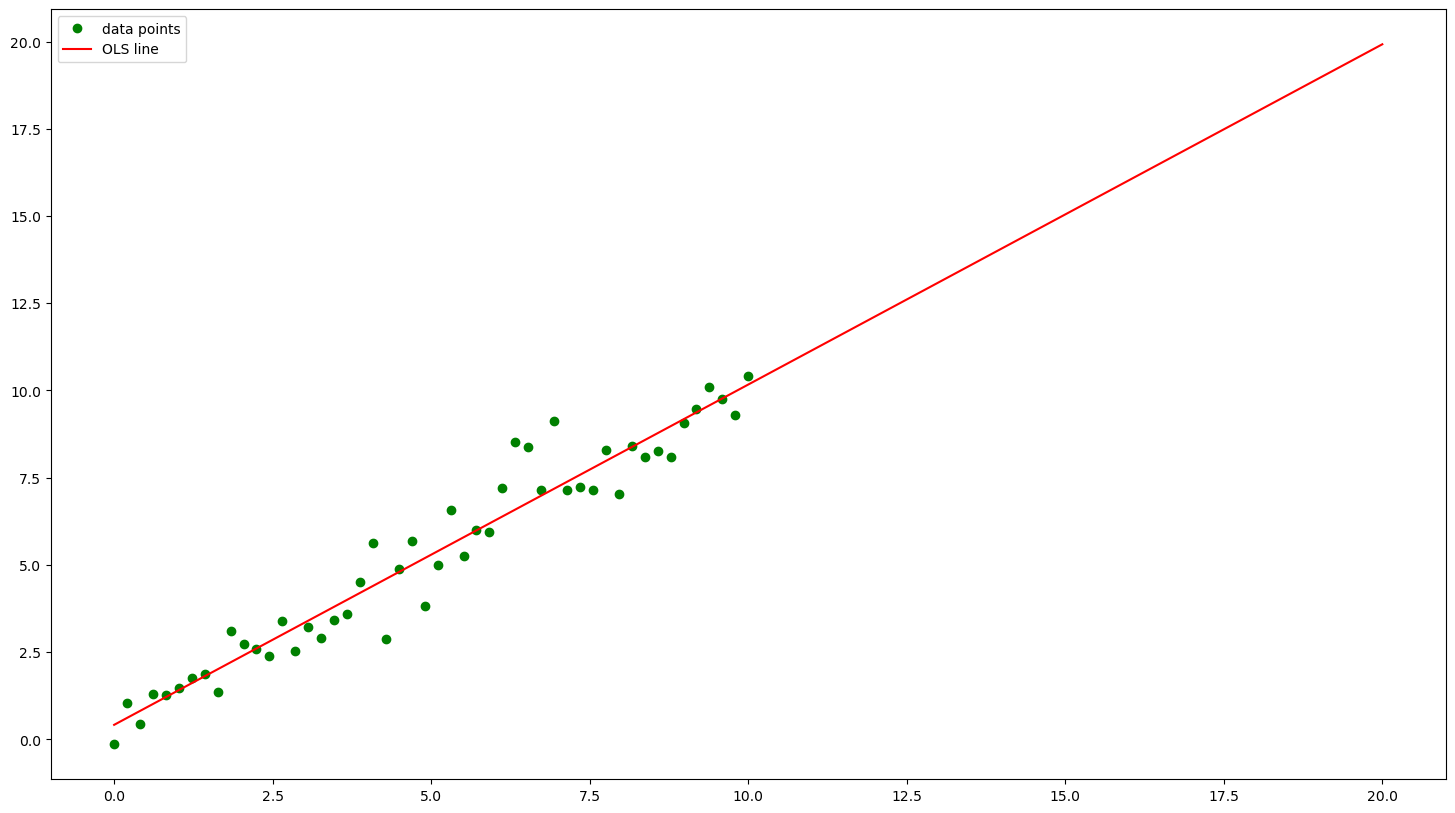

In [6]:
plt.figure(figsize=(18,10))
plt.plot(x, y, "go", label="data points")

x_extended = np.linspace(0,20)

plt.plot(x_extended, np.polyval(ols, x_extended), "r-", label="OLS line")
plt.legend()

In [7]:
dummy = np.arange(12)
lag = 3
matrix = np.zeros((lag+1,len(dummy)-lag))
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
matrix[lag] = dummy[lag:]
matrix

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [9]:
for i in range(lag):
    matrix[i] = dummy[i:i-lag]

matrix.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [10]:
matrix[:lag].T

array([[ 0.,  1.,  2.],
       [ 1.,  2.,  3.],
       [ 2.,  3.,  4.],
       [ 3.,  4.,  5.],
       [ 4.,  5.,  6.],
       [ 5.,  6.,  7.],
       [ 6.,  7.,  8.],
       [ 7.,  8.,  9.],
       [ 8.,  9., 10.]])

In [11]:
ols = np.linalg.lstsq(matrix[:lag].T,matrix[lag])[0]
ols

C:\Users\eke\AppData\Local\Temp\ipykernel_12308\3705948992.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ols = np.linalg.lstsq(matrix[:lag].T,matrix[lag])[0]


array([-0.66666667,  0.33333333,  1.33333333])

In [12]:
np.dot(matrix[:lag].T, ols)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [13]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt

yf.pdr_override()

In [14]:
US_EU = pdr.get_data_fred("DEXUSEU", dt.datetime(2010, 10, 1), dt.datetime(2023, 9, 19)).dropna()
US_EU

,DEXUSEU
DATE,
2010-10-01,1.3754
2010-10-04,1.3688
2010-10-05,1.3834
2010-10-06,1.3924
2010-10-07,1.3921
...,...
2023-09-11,1.0744
2023-09-12,1.0726
2023-09-13,1.0737


In [15]:
US_EU.rename(columns={"DEXUSEU":"price"},inplace=True)

In [16]:
lag = 5

In [17]:
us_eu = US_EU.copy()

In [18]:
cols = []
for i in np.arange(lag):
    col = f"lag_{i+1}"
    cols.append(col)

cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [19]:
for i in np.arange(lag):
    col = f"lag_{i+1}"
    us_eu[col] = us_eu["price"].shift(1+i)

In [20]:
us_eu1 = us_eu.dropna()

In [21]:
OLS = np.linalg.lstsq(us_eu1[cols],us_eu1["price"])[0]
OLS

C:\Users\eke\AppData\Local\Temp\ipykernel_12308\973001046.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  OLS = np.linalg.lstsq(us_eu1[cols],us_eu1["price"])[0]


array([ 1.01790477, -0.0309636 ,  0.00946435, -0.01442504,  0.01791884])

In [22]:
us_eu2 = us_eu1.copy()
us_eu2["pridiction"] = np.dot(us_eu1[cols],OLS)
us_eu2

,price,lag_1,lag_2,lag_3,lag_4,lag_5,pridiction
DATE,,,,,,,
2010-10-08,1.3923,1.3921,1.3924,1.3834,1.3688,1.3754,1.391905
2010-10-12,1.3846,1.3923,1.3921,1.3924,1.3834,1.3688,1.391874
2010-10-13,1.3964,1.3846,1.3923,1.3921,1.3924,1.3834,1.384159
2010-10-14,1.4066,1.3964,1.3846,1.3923,1.3921,1.3924,1.396576
2010-10-15,1.3998,1.4066,1.3964,1.3846,1.3923,1.3921,1.406512
...,...,...,...,...,...,...,...
2023-09-11,1.0744,1.0709,1.0704,1.0714,1.0727,1.0787,1.070926
2023-09-12,1.0726,1.0744,1.0709,1.0704,1.0714,1.0727,1.074375
2023-09-13,1.0737,1.0726,1.0744,1.0709,1.0704,1.0714,1.072430


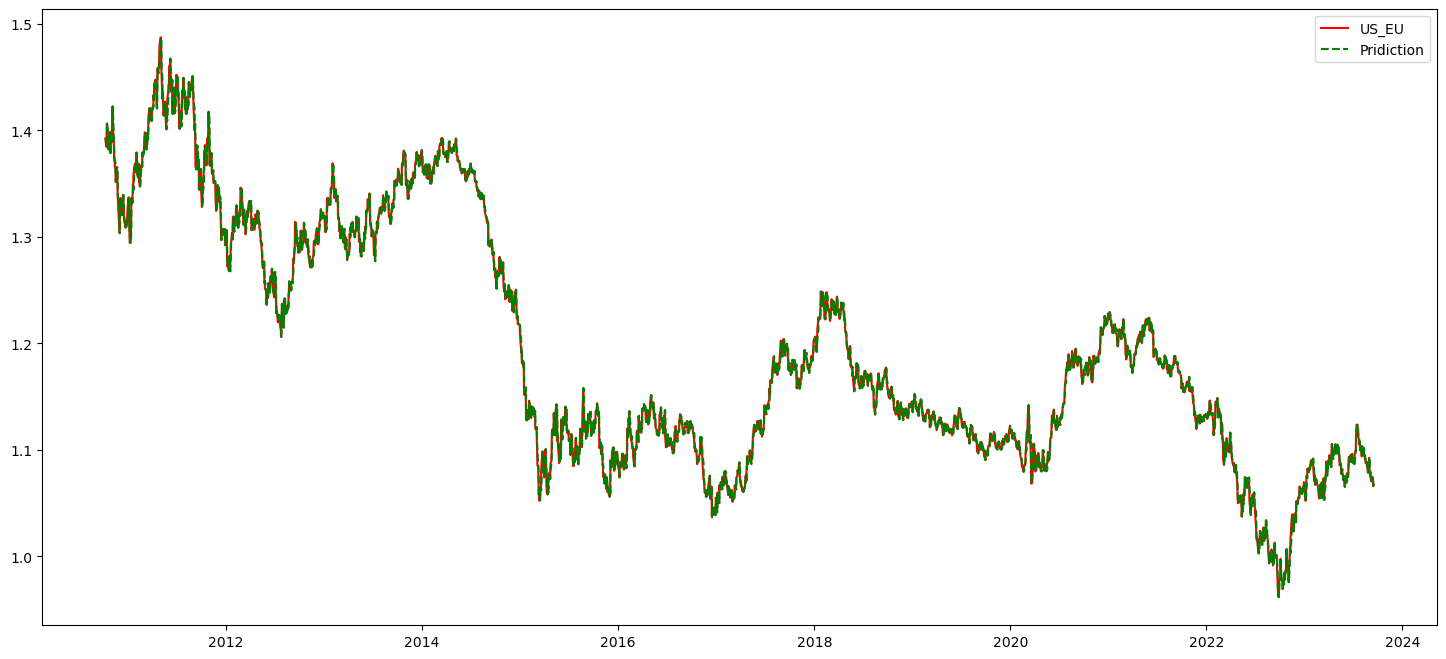

In [23]:
plt.figure(figsize=(18,8))
plt.plot(us_eu2["price"], "r-",label="US_EU")
plt.plot(us_eu2["pridiction"], "g--", label="Pridiction")
plt.legend()

In [24]:
us_eu2["return"] = np.log(us_eu2["price"]/us_eu2["price"].shift(1))
us_eu2 = us_eu2.dropna()
us_eu2

,price,lag_1,lag_2,lag_3,lag_4,lag_5,pridiction,return
DATE,,,,,,,,
2010-10-12,1.3846,1.3923,1.3921,1.3924,1.3834,1.3688,1.391874,-0.005546
2010-10-13,1.3964,1.3846,1.3923,1.3921,1.3924,1.3834,1.384159,0.008486
2010-10-14,1.4066,1.3964,1.3846,1.3923,1.3921,1.3924,1.396576,0.007278
2010-10-15,1.3998,1.4066,1.3964,1.3846,1.3923,1.3921,1.406512,-0.004846
2010-10-18,1.3978,1.3998,1.4066,1.3964,1.3846,1.3923,1.399501,-0.001430
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,1.0709,1.0704,1.0714,1.0727,1.0787,1.070926,0.003263
2023-09-12,1.0726,1.0744,1.0709,1.0704,1.0714,1.0727,1.074375,-0.001677
2023-09-13,1.0737,1.0726,1.0744,1.0709,1.0704,1.0714,1.072430,0.001025


In [25]:
cols = []
us_eu3 = us_eu2.copy()
for i in range(1,lag+1):
    col = f"lag_{i}"
    cols.append(col)
    us_eu3[col] = us_eu3["return"].shift(i)

us_eu3 = us_eu3.dropna()
us_eu3

,price,lag_1,lag_2,lag_3,lag_4,lag_5,pridiction,return
DATE,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,1.397464,-0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,1.382156,0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,1.395304,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,1.397133,-0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,1.390333,0.005880
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,1.070926,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,1.074375,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,1.072430,0.001025


In [26]:
import random
classmates = ["A", "B", "C"]
random.choice(classmates)

'B'

In [27]:
OLS = np.linalg.lstsq(us_eu3[cols], us_eu3["return"])[0]
OLS

C:\Users\eke\AppData\Local\Temp\ipykernel_12308\3038291845.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  OLS = np.linalg.lstsq(us_eu3[cols], us_eu3["return"])[0]


array([ 0.01669099, -0.00889046, -0.00525715, -0.01550815, -0.02106341])

In [28]:
us_eu3["pridiction"] = np.dot(us_eu3[cols], OLS)
us_eu3

,price,lag_1,lag_2,lag_3,lag_4,lag_5,pridiction,return
DATE,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,-0.000034,-0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,-0.000435,0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,0.000173,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,0.000132,-0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,0.000054,0.005880
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,0.000210,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,0.000192,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,-0.000019,0.001025


<Axes: xlabel='DATE'>

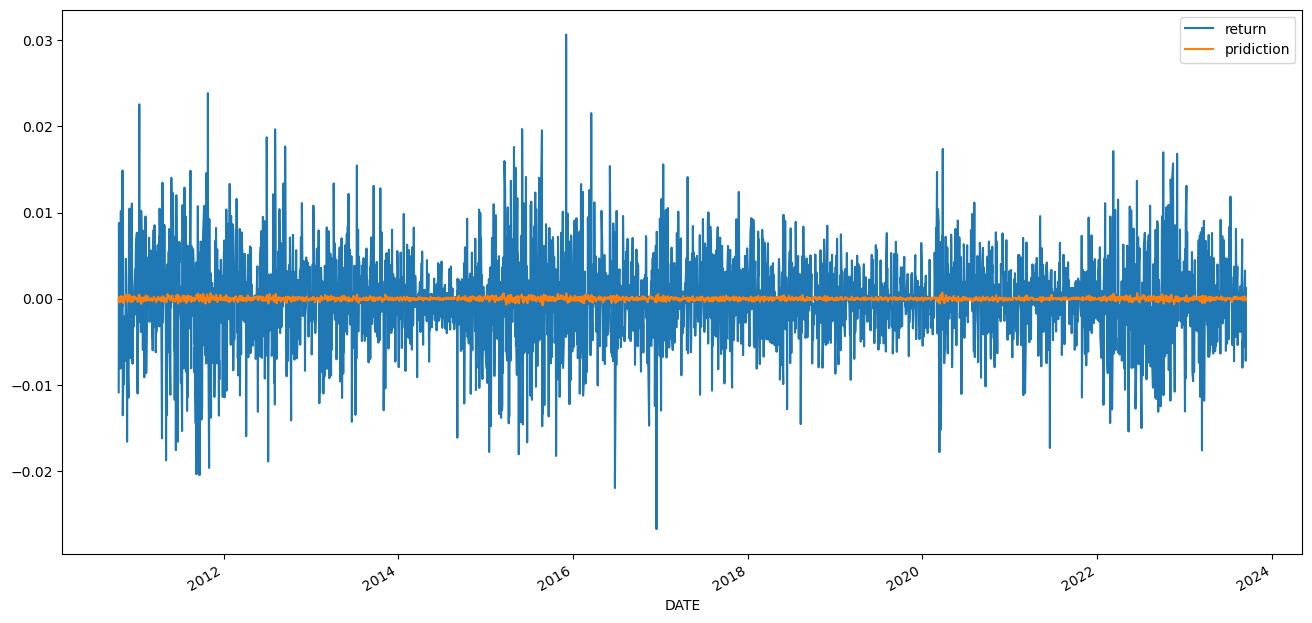

In [29]:
us_eu3[["return", "pridiction"]].plot(figsize=(16,8))

In [30]:
accuracy = np.sign(us_eu3["return"]*us_eu3["pridiction"]).value_counts()

In [31]:
accuracy

 1.0    1672
-1.0    1531
 0.0      26
Name: count, dtype: int64

In [32]:
accuracy.values[0]

1672

In [35]:
us_eu4 = us_eu3.copy()
us_eu4

,price,lag_1,lag_2,lag_3,lag_4,lag_5,pridiction,return
DATE,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,-0.000034,-0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,-0.000435,0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,0.000173,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,0.000132,-0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,0.000054,0.005880
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,0.000210,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,0.000192,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,-0.000019,0.001025


In [39]:
ols = np.linalg.lstsq(us_eu4[cols], np.sign(us_eu4["return"]))[0]
ols

C:\Users\eke\AppData\Local\Temp\ipykernel_12308\530330110.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ols = np.linalg.lstsq(us_eu4[cols], np.sign(us_eu4["return"]))[0]


array([-2.0023976 , -6.52936778, -0.47869415, -6.65709789, -3.79871434])

In [42]:
us_eu4["pridiction"] = np.sign(np.dot(us_eu4[cols], ols))
us_eu4

,price,lag_1,lag_2,lag_3,lag_4,lag_5,pridiction,return
DATE,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,-1.0,-0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,-1.0,0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,1.0,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,-1.0,-0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,1.0,0.005880
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,1.0,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,1.0,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,-1.0,0.001025


In [45]:
accuracy = np.sign(us_eu4["pridiction"]*us_eu4["return"]).value_counts()
accuracy

 1.0    1636
-1.0    1567
 0.0      26
Name: count, dtype: int64

In [46]:
accuracy.values[0]/sum(accuracy)

0.5066584081759059

In [48]:
us_eu4.rename(columns={"pridiction":"prediction"}, inplace=True)
us_eu4

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
DATE,,,,,,,,
2010-10-19,1.3827,-0.001430,-0.004846,0.007278,0.008486,-0.005546,-1.0,-0.010861
2010-10-20,1.3949,-0.010861,-0.001430,-0.004846,0.007278,0.008486,-1.0,0.008785
2010-10-21,1.3973,0.008785,-0.010861,-0.001430,-0.004846,0.007278,1.0,0.001719
2010-10-22,1.3904,0.001719,0.008785,-0.010861,-0.001430,-0.004846,-1.0,-0.004950
2010-10-25,1.3986,-0.004950,0.001719,0.008785,-0.010861,-0.001430,1.0,0.005880
...,...,...,...,...,...,...,...,...
2023-09-11,1.0744,0.000467,-0.000934,-0.001213,-0.005578,-0.004809,1.0,0.003263
2023-09-12,1.0726,0.003263,0.000467,-0.000934,-0.001213,-0.005578,1.0,-0.001677
2023-09-13,1.0737,-0.001677,0.003263,0.000467,-0.000934,-0.001213,-1.0,0.001025


In [50]:
us_eu5 = us_eu4.copy()
us_eu5["strategy"] = us_eu5["prediction"]*us_eu5["return"]
np.exp(us_eu5[["strategy", "return"]].sum())

strategy    0.950236
return      0.763557
dtype: float64

<Axes: xlabel='DATE'>

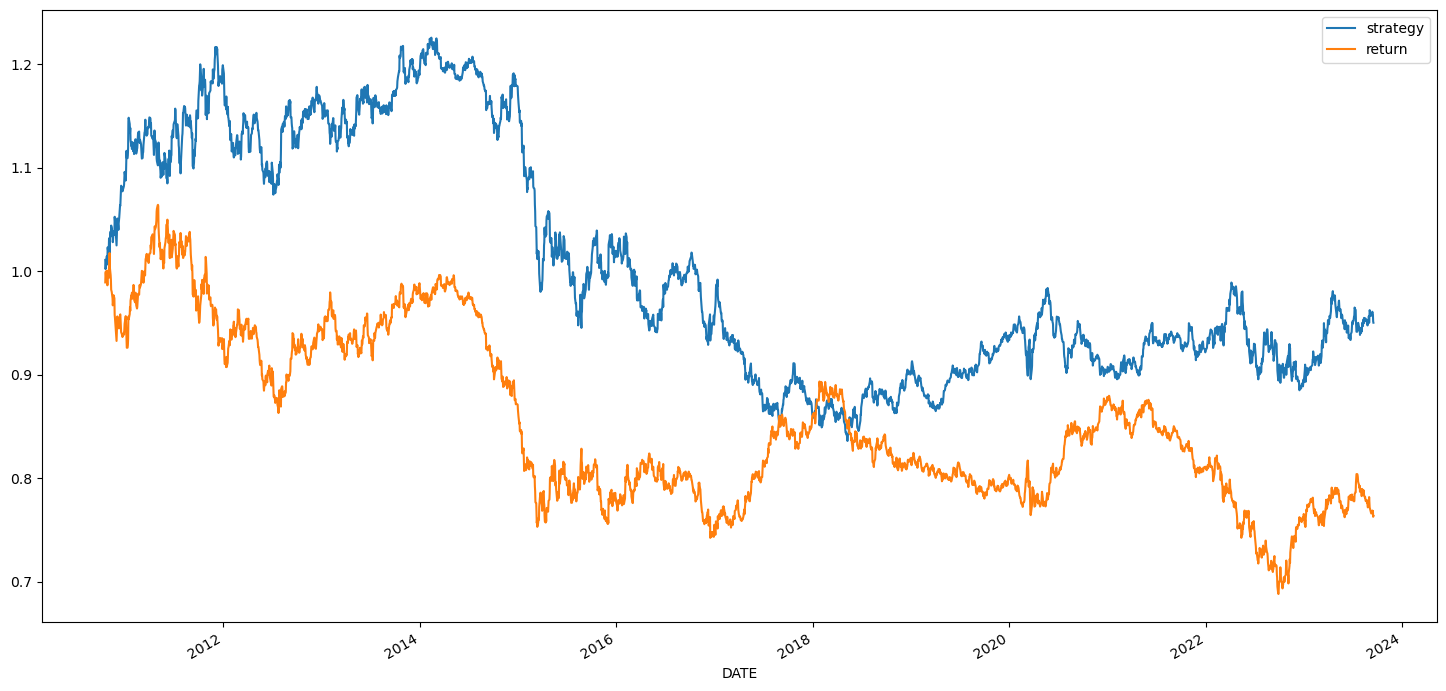

In [54]:
np.exp(us_eu5[["strategy", "return"]].cumsum()).plot(figsize=(18,9))

In [63]:
data = np.arange(12)
lag = 3
matrix = np.zeros((lag+1,len(data)-lag))
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [64]:
matrix[lag] = data[lag:]
for i in range(lag):
    matrix[i] = data[i:i-lag]

matrix

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [65]:
from sklearn import linear_model

In [66]:
LM = linear_model.LinearRegression()

In [67]:
LM.fit(matrix[:lag].T, matrix[lag])

LinearRegression()

In [68]:
LM.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [69]:
LM.intercept_

2.0000000000000018

In [72]:
LM.predict(matrix[:lag].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [73]:
LM = linear_model.LinearRegression(fit_intercept=False)
LM.fit(matrix[:lag].T, matrix[lag])
LM.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [74]:
LM.intercept_

0.0

In [75]:
LM.predict(matrix[:lag].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [76]:
hours_of_study = [0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25, 4.5, 4.75, 5., 5.5]
pass_exam = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

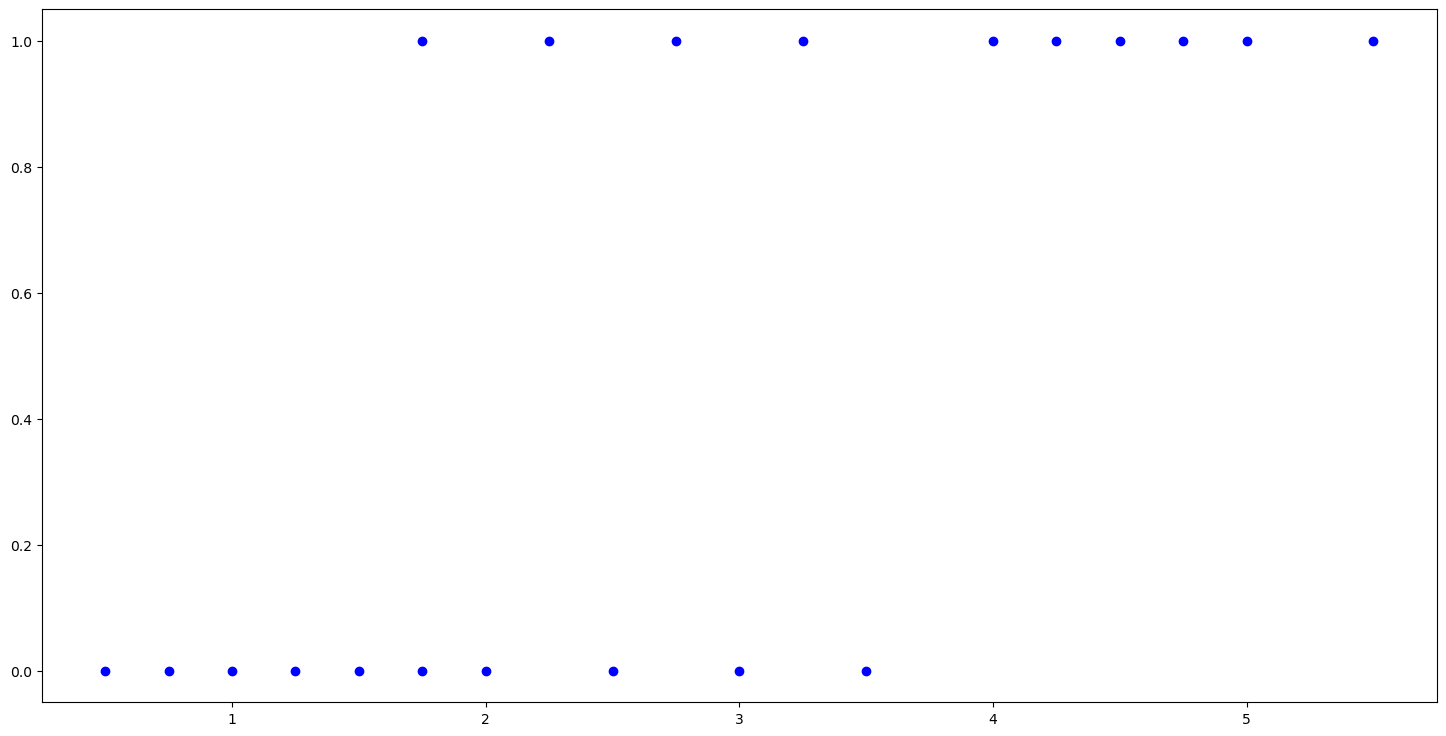

In [78]:
plt.figure(figsize=(18,9))
plt.plot(hours_of_study, pass_exam, "bo")

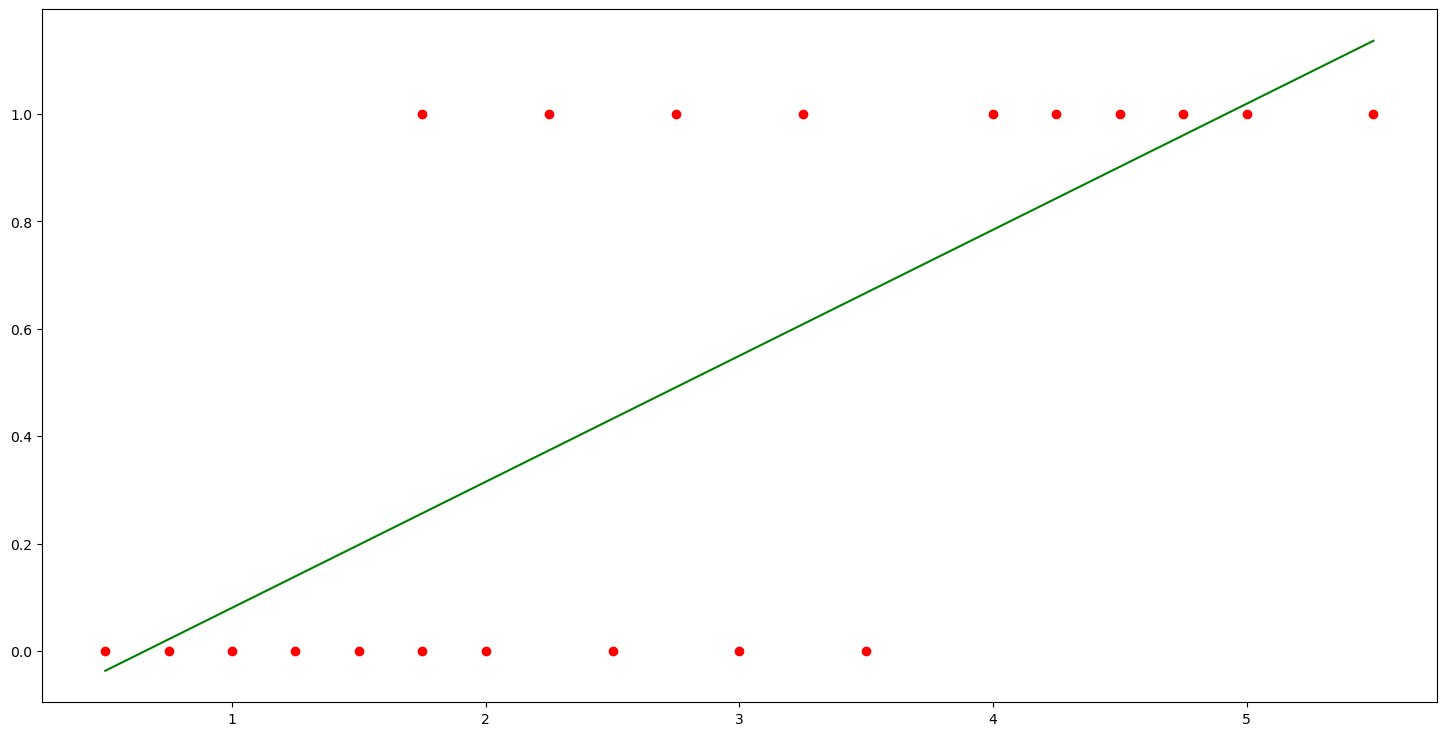

In [81]:
regress = np.polyfit(hours_of_study, pass_exam,deg=1)
plt.figure(figsize=(18,9))
plt.plot(hours_of_study, pass_exam, "ro")
plt.plot(hours_of_study, np.polyval(regress, hours_of_study), "g-")

In [82]:
model = linear_model.LogisticRegression(solver="lbfgs")
model

LogisticRegression()

In [85]:
hours_of_study = np.array(hours_of_study)
hours_of_study = hours_of_study.reshape(1,-1)

In [90]:
model.fit(hours_of_study.T, pass_exam)

LogisticRegression()

In [94]:
model.predict(hours_of_study.T)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

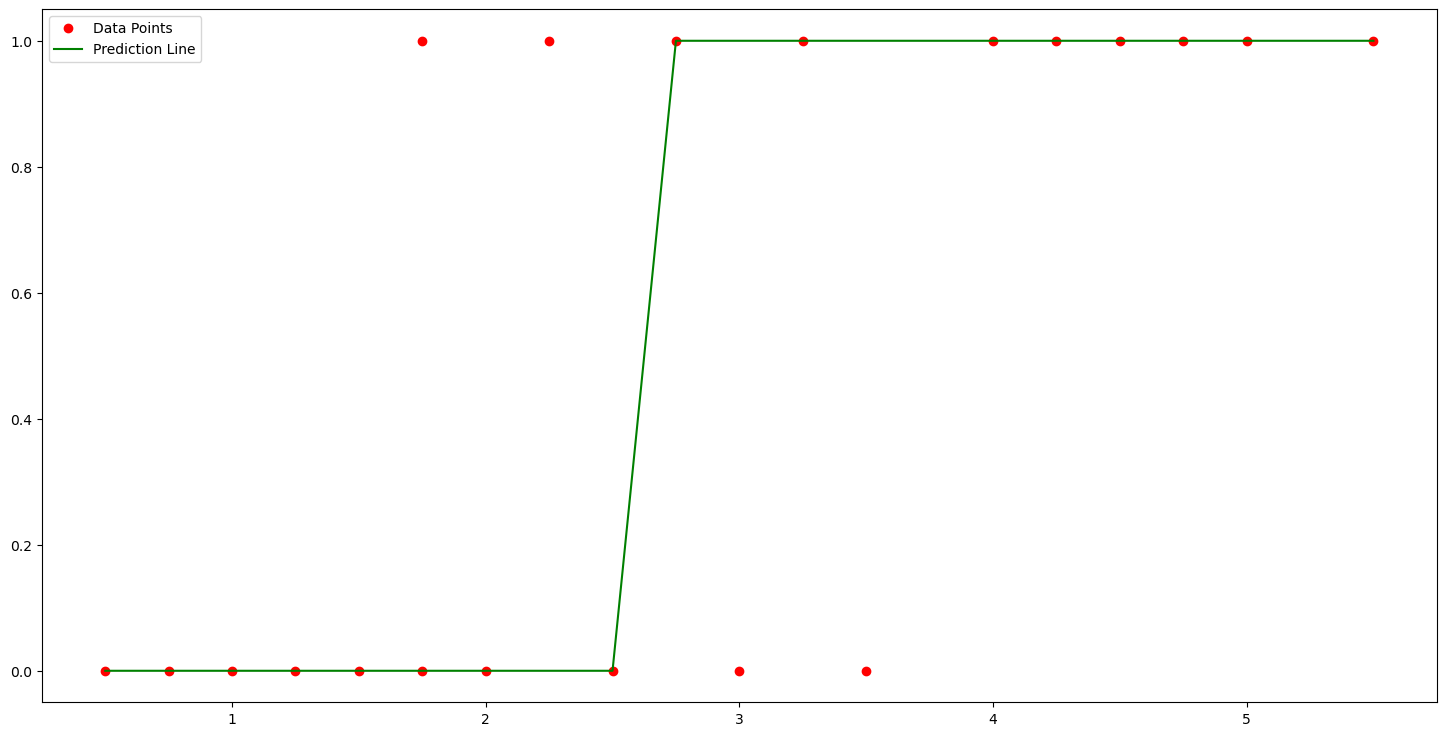

In [98]:
plt.figure(figsize=(18,9))
plt.plot(hours_of_study.T, pass_exam, "ro", label="Data Points")
plt.plot(hours_of_study.T, model.predict(hours_of_study.T), "g", label = "Prediction Line")
plt.legend()

In [100]:
probas = model.predict_proba(hours_of_study.T)

In [102]:
pass_exam

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

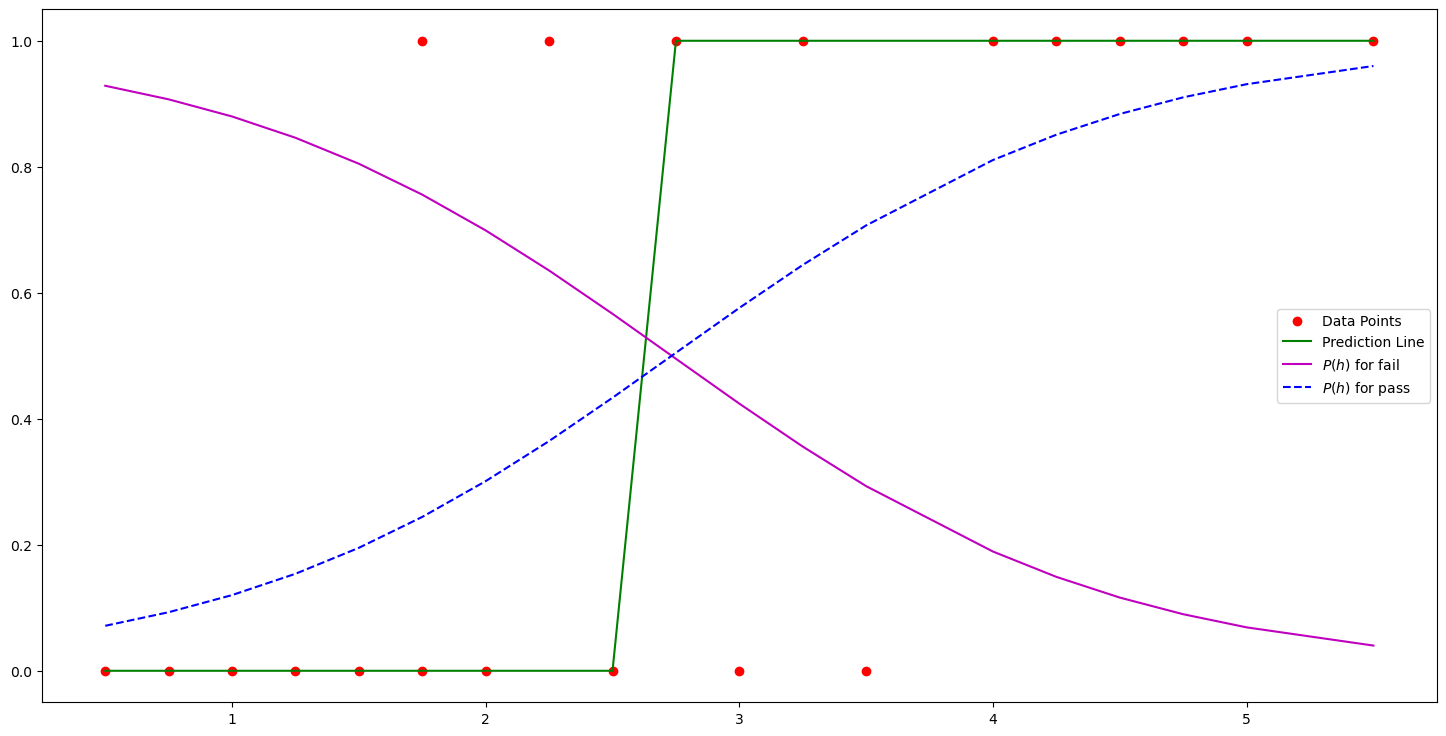

In [106]:
plt.figure(figsize=(18,9))
plt.plot(hours_of_study.T, pass_exam, "ro", label="Data Points")
plt.plot(hours_of_study.T, model.predict(hours_of_study.T), "g", label = "Prediction Line")
plt.plot(hours_of_study.T, probas.T[0], "m-", label = "$P(h)$ for fail")
plt.plot(hours_of_study.T, probas.T[1], "b--", label = "$P(h)$ for pass")
plt.legend()

In [108]:
GOLD = pdr.get_data_yahoo("GLD", dt.datetime(2010,10,1), dt.datetime(2022,10,19))
GOLD

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-01,127.910004,129.070007,127.910004,128.910004,128.910004,17211900
2010-10-04,128.520004,128.619995,128.220001,128.460007,128.460007,8368000
2010-10-05,130.110001,131.119995,129.869995,130.990005,130.990005,17489600
2010-10-06,131.449997,131.860001,131.339996,131.809998,131.809998,16142200
2010-10-07,132.600006,132.669998,129.509995,130.369995,130.369995,38676800
...,...,...,...,...,...,...
2022-10-12,155.509995,156.289993,155.259995,155.990005,155.990005,3998500
2022-10-13,153.479996,155.729996,152.919998,154.910004,154.910004,7083800
2022-10-14,154.020004,154.199997,152.720001,152.979996,152.979996,5471900


In [109]:
GOLD["return"] = np.log(GOLD["Close"]/GOLD["Close"].shift(1))
GOLD

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2010-10-01,127.910004,129.070007,127.910004,128.910004,128.910004,17211900,NaN
2010-10-04,128.520004,128.619995,128.220001,128.460007,128.460007,8368000,-0.003497
2010-10-05,130.110001,131.119995,129.869995,130.990005,130.990005,17489600,0.019503
2010-10-06,131.449997,131.860001,131.339996,131.809998,131.809998,16142200,0.006240
2010-10-07,132.600006,132.669998,129.509995,130.369995,130.369995,38676800,-0.010985
...,...,...,...,...,...,...,...
2022-10-12,155.509995,156.289993,155.259995,155.990005,155.990005,3998500,0.005335
2022-10-13,153.479996,155.729996,152.919998,154.910004,154.910004,7083800,-0.006948
2022-10-14,154.020004,154.199997,152.720001,152.979996,152.979996,5471900,-0.012537


In [110]:
GOLD.dropna(inplace=True)


In [129]:
lags = 3
gold = GOLD.copy()
cols = []

for i in range(1,lags+1):
    col = f"lag_{i}"
    cols.append(col)
    gold[col] = gold["return"].shift(i)

gold.dropna(inplace=True)
gold

,Open,High,Low,Close,Adj Close,Volume,return,lag_1,lag_2,lag_3
Date,,,,,,,,,,
2010-10-07,132.600006,132.669998,129.509995,130.369995,130.369995,38676800,-0.010985,0.006240,0.019503,-0.003497
2010-10-08,130.779999,131.880005,130.470001,131.660004,131.660004,18693300,0.009846,-0.010985,0.006240,0.019503
2010-10-11,131.279999,132.330002,130.979996,132.289993,132.289993,10621300,0.004774,0.009846,-0.010985,0.006240
2010-10-12,132.059998,132.210007,131.360001,131.960007,131.960007,13289200,-0.002498,0.004774,0.009846,-0.010985
2010-10-13,132.729996,134.309998,132.630005,134.070007,134.070007,18398500,0.015863,-0.002498,0.004774,0.009846
...,...,...,...,...,...,...,...,...,...,...
2022-10-12,155.509995,156.289993,155.259995,155.990005,155.990005,3998500,0.005335,-0.002060,-0.015318,-0.011023
2022-10-13,153.479996,155.729996,152.919998,154.910004,154.910004,7083800,-0.006948,0.005335,-0.002060,-0.015318
2022-10-14,154.020004,154.199997,152.720001,152.979996,152.979996,5471900,-0.012537,-0.006948,0.005335,-0.002060


In [130]:
M = linear_model.LogisticRegression(solver="lbfgs", C = 1e7, max_iter=1000, multi_class="auto")

In [131]:
M.fit(gold[cols], np.sign(gold["return"]))

E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

LogisticRegression(C=10000000.0, max_iter=1000)

In [132]:
gold["prediction"] = M.predict(gold[cols])
gold[["prediction"]].value_counts()

E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


prediction
 1.0          2744
-1.0           285
Name: count, dtype: int64

In [137]:
#accuracy = np.sign(gold["prediction"].iloc[lags:]*gold["return"].iloc[lags:]).value_counts()
accuracy = np.sign(gold["prediction"]*gold["return"]).value_counts()
accuracy

 1.0    1573
-1.0    1445
 0.0      11
Name: count, dtype: int64

In [138]:
accuracy.values[0]/sum(accuracy)

0.51931330472103

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(gold["prediction"], np.sign(gold["return"]))

E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

0.51931330472103

In [143]:
gold["strategy"] = gold["return"]*gold["prediction"]
gold[["return", "strategy"]].sum().apply(np.exp)

return      1.166452
strategy    1.073198
dtype: float64

<Axes: xlabel='Date'>

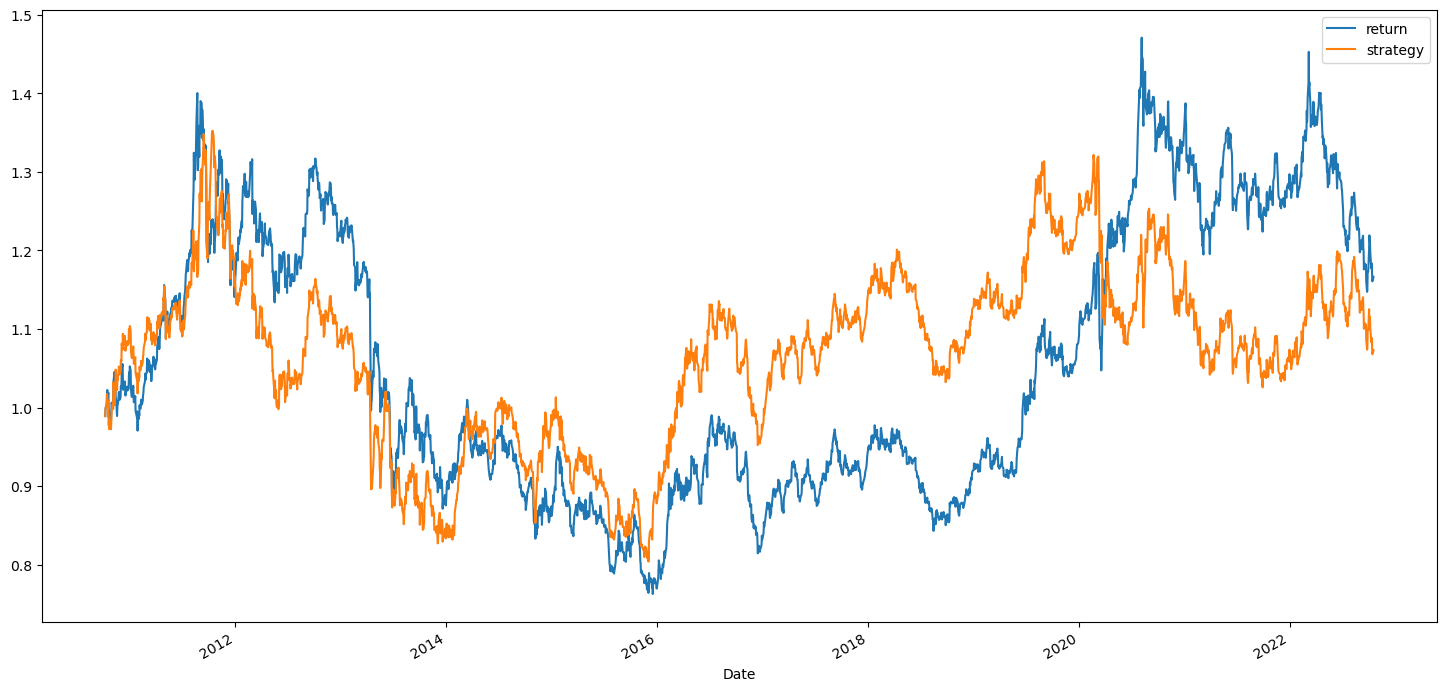

In [144]:
gold[["return", "strategy"]].cumsum().apply(np.exp).plot(figsize = (18,9))

In [146]:
lags = 5

In [177]:
gold1 = gold.copy()
gold1["return"] = np.log(gold1["Close"]/gold1["Close"].shift(1))
gold1.dropna(inplace=True)
gold1

,Open,High,Low,Close,Adj Close,Volume,return,lag_1,lag_2,lag_3,prediction,strategy
Date,,,,,,,,,,,,
2010-10-08,130.779999,131.880005,130.470001,131.660004,131.660004,18693300,0.009846,-0.010985,0.006240,0.019503,1.0,0.009846
2010-10-11,131.279999,132.330002,130.979996,132.289993,132.289993,10621300,0.004774,0.009846,-0.010985,0.006240,1.0,0.004774
2010-10-12,132.059998,132.210007,131.360001,131.960007,131.960007,13289200,-0.002498,0.004774,0.009846,-0.010985,1.0,-0.002498
2010-10-13,132.729996,134.309998,132.630005,134.070007,134.070007,18398500,0.015863,-0.002498,0.004774,0.009846,1.0,0.015863
2010-10-14,134.059998,134.850006,133.899994,134.750000,134.750000,26890500,0.005059,0.015863,-0.002498,0.004774,-1.0,-0.005059
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12,155.509995,156.289993,155.259995,155.990005,155.990005,3998500,0.005335,-0.002060,-0.015318,-0.011023,1.0,0.005335
2022-10-13,153.479996,155.729996,152.919998,154.910004,154.910004,7083800,-0.006948,0.005335,-0.002060,-0.015318,1.0,-0.006948
2022-10-14,154.020004,154.199997,152.720001,152.979996,152.979996,5471900,-0.012537,-0.006948,0.005335,-0.002060,1.0,-0.012537


In [178]:
cols = []
for i in range(1, lags+1):
    col = f"lag_{i}"
    cols.append(col)
    gold1[col] = gold1["return"].shift(i)

gold1.dropna(inplace=True)
gold1

,Open,High,Low,Close,Adj Close,Volume,return,lag_1,lag_2,lag_3,prediction,strategy,lag_4,lag_5
Date,,,,,,,,,,,,,,
2010-10-15,134.240005,134.460007,133.070007,133.679993,133.679993,26168600,-0.007972,0.005059,0.015863,-0.002498,1.0,-0.007972,0.004774,0.009846
2010-10-18,133.460007,134.339996,133.160004,134.279999,134.279999,12289500,0.004478,-0.007972,0.005059,0.015863,1.0,0.004478,-0.002498,0.004774
2010-10-19,130.460007,131.589996,129.750000,130.110001,130.110001,25327200,-0.031547,0.004478,-0.007972,0.005059,1.0,-0.031547,0.015863,-0.002498
2010-10-20,130.360001,131.649994,130.320007,131.320007,131.320007,12556600,0.009257,-0.031547,0.004478,-0.007972,1.0,0.009257,0.005059,0.015863
2010-10-21,131.080002,131.589996,128.720001,129.470001,129.470001,21804200,-0.014188,0.009257,-0.031547,0.004478,1.0,-0.014188,-0.007972,0.005059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12,155.509995,156.289993,155.259995,155.990005,155.990005,3998500,0.005335,-0.002060,-0.015318,-0.011023,1.0,0.005335,-0.001127,-0.005554
2022-10-13,153.479996,155.729996,152.919998,154.910004,154.910004,7083800,-0.006948,0.005335,-0.002060,-0.015318,1.0,-0.006948,-0.011023,-0.001127
2022-10-14,154.020004,154.199997,152.720001,152.979996,152.979996,5471900,-0.012537,-0.006948,0.005335,-0.002060,1.0,-0.012537,-0.015318,-0.011023


In [179]:
M.fit(gold1[cols], np.sign(gold1["return"]))

E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

LogisticRegression(C=10000000.0, max_iter=1000)

In [180]:
gold1["prediction"] = M.predict(gold1[cols])
gold1["strategy"] = gold1["prediction"]*gold1["return"]
gold1[["return", "strategy"]].sum().apply(np.exp)

E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


return      1.141002
strategy    0.961363
dtype: float64

In [181]:
gold1["prediction"].value_counts()

prediction
 1.0    2714
-1.0     309
Name: count, dtype: int64

In [182]:
accuracy = np.sign(gold1["prediction"].iloc[lags:]*gold1["return"].iloc[lags:]).value_counts()
accuracy

 1.0    1573
-1.0    1434
 0.0      11
Name: count, dtype: int64

In [183]:
accuracy_score(gold1["prediction"], np.sign(gold1["return"]))

E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
E:\software\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

0.5210056235527621

<Axes: xlabel='Date'>

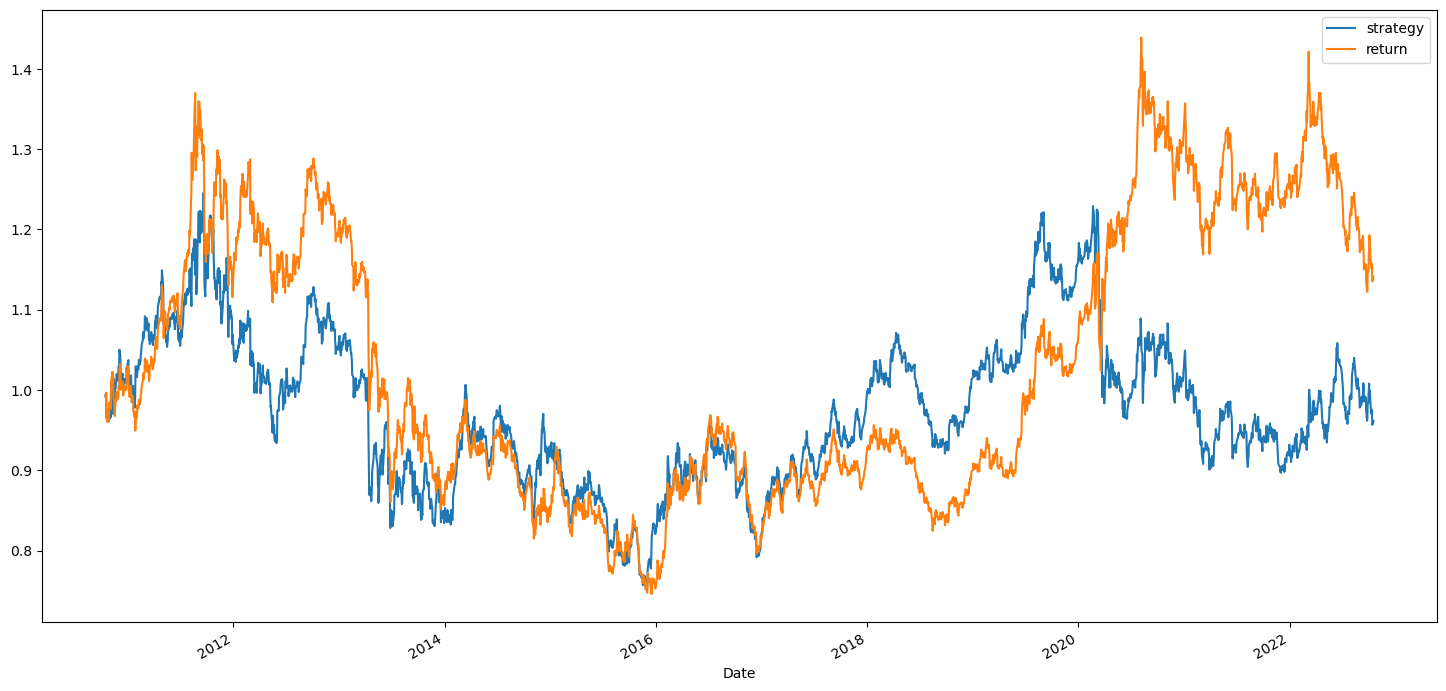

In [184]:
gold1["strategy"] = gold1["prediction"]*gold1["return"]

gold1[["strategy", "return"]].cumsum().apply(np.exp).plot(figsize=(18,9))